程式 6-17 以Numpy實現簡單的RNN

In [1]:
import numpy as np

# 設定序列資料中的時間點數量
timesteps = 100
# 輸入特徵空間的維度
input_features = 32
# 輸出特徵空間的維度
output_features = 64

# Input Data為隨機產生的數值
inputs = np.random.random((timesteps, input_features))
# 設定神經網路初始的狀態，為全零向量
state_t = np.zeros((output_features, ))

# 建立隨機權重矩陣
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,)) # 建立隨機偏移向量

successive_outputs = [] # 儲存各時間點的輸出
for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

  successive_outputs.append(output_t)
  #print(successive_outputs.shape)
  state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)  
print(final_output_sequence.shape)


(6400,)


程式 6-18 準備IMDB資料

In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

# 考慮做為特徵的文字數量
max_features = 10000
# 評論的前500個字
max_len = 500

batch_size = 32

print("讀取資料...")
(input_train, y_train),(input_test, y_test) = imdb.load_data(num_words = max_features)

#print(len(input_train), 'train sequences')
#print(len(input_test), 'test sequnces')

print("Pad sequences ( samples x time)")
# 只看每篇評論的前55字，多的去除，不足填補
input_train = sequence.pad_sequences(input_train, maxlen = max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
#print('input_train shape:', input_train.shape)	# shape=(25000, 500)
#print('input_test shape:', input_test.shape)	# shape=(25000, 500)


讀取資料...
17465344/17464789 [==============================] - 1s 0us/step
Pad sequences ( samples x time)


程式 6-19 以嵌入向量Embedding層和SimpleRNN層訓練模型

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=10, batch_size = 128, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.6419 - acc: 0.6184 - val_loss: 0.6123 - val_acc: 0.6550
Epoch 2/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.4114 - acc: 0.8247 - val_loss: 0.3829 - val_acc: 0.8356
Epoch 3/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.3367 - acc: 0.8606 - val_loss: 0.3997 - val_acc: 0.8298
Epoch 4/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.2307 - acc: 0.9104 - val_loss: 0.4203 - val_acc: 0.8304
Epoch 5/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.1873 - acc: 0.9266 - val_loss: 0.4672 - val_acc: 0.8230
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1293 - acc: 0.9537 - val_loss: 0.4143 - val_acc: 0.8528
Epoch 7/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0919 - acc: 0.9690 - val_loss: 0.4928 - val_acc:

程式 6-20 繪製結果

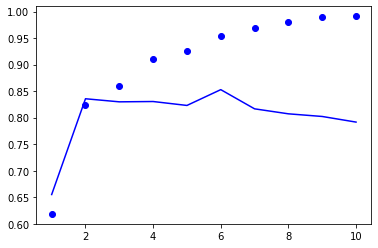

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc')

程式 6-21 於Keras中使用LSTM層

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.5138 - acc: 0.7526 - val_loss: 0.3627 - val_acc: 0.8508
Epoch 2/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.2958 - acc: 0.8842 - val_loss: 0.3064 - val_acc: 0.8762
Epoch 3/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.2295 - acc: 0.9155 - val_loss: 0.2905 - val_acc: 0.8824
Epoch 4/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.2001 - acc: 0.9244 - val_loss: 0.2775 - val_acc: 0.8844
Epoch 5/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.1871 - acc: 0.9332 - val_loss: 0.2889 - val_acc: 0.8882
Epoch 6/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.1560 - acc: 0.9446 - val_loss: 0.3369 - val_acc: 0.8878
Epoch 7/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1430 - acc: 0.9488 - val_loss: 0.3279 - val_acc:

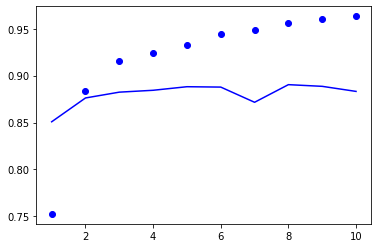

In [6]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

